In [1]:
#pip freeze > requirements.txt

**Import necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score

import warnings
warnings.filterwarnings("ignore")

**Loading the Data**

In [3]:
df = pd.read_csv("autism.csv")
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,1,1,1,1,0,0,1,1,0,0,26,F,White-European,No,No,Self,No
1,1,1,1,0,1,1,0,1,1,1,1,27,M,Latino,Yes,Yes,Parent,Yes
2,2,1,1,0,1,0,0,1,1,0,1,35,F,White-European,No,Yes,Self,No
3,3,1,0,0,0,0,0,0,1,0,0,40,F,Asian,No,No,Family Member,No
4,4,1,1,1,1,1,0,1,1,1,1,36,M,Others,Yes,No,Self,Yes


In [4]:
df1 = df.drop(df.columns[0], axis = 1)
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,1,1,1,0,0,1,1,0,0,26,F,White-European,No,No,Self,No
1,1,1,0,1,1,0,1,1,1,1,27,M,Latino,Yes,Yes,Parent,Yes
2,1,1,0,1,0,0,1,1,0,1,35,F,White-European,No,Yes,Self,No
3,1,0,0,0,0,0,0,1,0,0,40,F,Asian,No,No,Family Member,No
4,1,1,1,1,1,0,1,1,1,1,36,M,Others,Yes,No,Self,Yes


In [5]:
df1.shape

(3743, 17)

In [6]:
df1.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10_Autism_Spectrum_Quotient', 'Age_Years', 'Sex', 'Ethnicity',
       'Jaundice', 'Family_mem_with_ASD', 'Who_completed_the_test',
       'ASD_traits'],
      dtype='object')

**Data Cleaning**

In [7]:
df1.rename(columns={"A10_Autism_Spectrum_Quotient": "A10"}, inplace=True)

In [8]:
df1['Ethnicity'] = df1['Ethnicity'].replace('White-European', 'White European')
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,1,1,1,0,0,1,1,0,0,26,F,White European,No,No,Self,No
1,1,1,0,1,1,0,1,1,1,1,27,M,Latino,Yes,Yes,Parent,Yes
2,1,1,0,1,0,0,1,1,0,1,35,F,White European,No,Yes,Self,No
3,1,0,0,0,0,0,0,1,0,0,40,F,Asian,No,No,Family Member,No
4,1,1,1,1,1,0,1,1,1,1,36,M,Others,Yes,No,Self,Yes


In [9]:
df1['Ethnicity'].value_counts()

Ethnicity
Asian             1122
White European    1116
Middle Eastern     683
South Asian        351
Black              149
Others             100
Hispanic            93
Latino              72
Pacifica            28
Mixed               16
Turkish              6
Native Indian        6
others               1
Name: count, dtype: int64

In [10]:
df1['Age_Years'].max()

383

In [11]:
df1.drop(df1[df1["Age_Years"]==383].index, inplace=True)
df1.shape

(3742, 17)

**The Age_Years column had an error with 383 years. The corresponding row has been dropped to minimise the error.**

**Exploratory Data Analysis**

In [12]:
from skimpy import skim
skim(df1)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3742   │ │ int64       │ 11    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 6     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %    ┃ mean      ┃ sd        ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ A1               │    0 │       0 │     0.453 │    0.4978 │    0 │     0 │     0 │     1 │     1 │ ▇    ▇  │  │
│ │ A2               │    0 │       0 │    0.3381 │    0.4731 │    0 │     0 │     0 │     1 │     1 │ ▇    ▅  │  │
│ │ A3               │    0 │       0 │    0.3121 │    0.4634 │    0 │     0 │     0 │     1 │     1 │ ▇    ▃  │  │
│ │ A4               │    0 │       0 │    0.3819 │    0.4859 │    0 │     0 │     0 │     1 │     1 │ ▇    ▅  │  │
│ │ A5               │    0 │       0 │    0.3894 │    0.4877 │    0 │     0 │     0 │     1 │     1 │ ▇    ▅  │  │
│ │ A6               │    0 │       0 │    0.3784 │    0.4851 │    0 │     0 │     0 │     1 │     1 │ ▇    ▅  │  │
│ │ A7               │    0 │       0 │    0.4447 │     0.497 │    0 │     0 │     0 │     1 │     1 │ ▇    ▆  │  │
│ │ A8               │    0 │       0 │    0.3808 │    0.4857 │    0 │     0 │     0 │     1 │     1 │ ▇    ▅  │  │
│ │ A9               │    0 │       0 │    0.3367 │    0.4727 │    0 │     0 │     0 │     1 │     1 │ ▇    ▅  │  │
│ │ A10              │    0 │       0 │    0.5099 │       0.5 │    0 │     0 │     1 │     1 │     1 │ ▇    ▇  │  │
│ │ Age_Years        │    0 │       0 │     11.15 │     10.64 │    1 │     3 │     8 │    14 │    64 │   ▇▃▁   │  │
│ └──────────────────┴──────┴─────────┴───────────┴───────────┴──────┴───────┴───────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Sex                                   │     0 │         0 │                        1 │                3742 │  │
│ │ Ethnicity                             │     0 │         0 │                      1.6 │                5898 │  │
│ │ Jaundice                              │     0 │         0 │                        1 │                3742 │  │
│ │ Family_mem_with_ASD                   │     0 │         0 │                        1 │                3742 │  │
│ │ Who_completed_the_test                │     0 │         0 │                      2.2 │                8161 │  │
│ │ ASD_traits                            │     0 │         0 │                        1 │                3742 │  │
│ └───────────────────────────────────────┴───────┴─────

**Countplot to determine the number of males and females in the data**

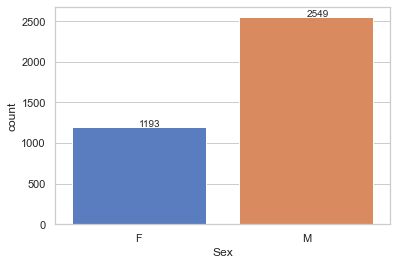

In [13]:
sns.set(style = "whitegrid")
total = float(len(df1))
ax = sns.countplot(x="Sex", data=df1, palette="muted")

for z in ax.patches:
    height = z.get_height()
    ax.text(z.get_x()+z.get_width()/2., height + 3, "{:1.0f}".format(height, ha = "center"))
plt.show()

**Bar plot to visualise among males and females who were mostly affected by ASD**

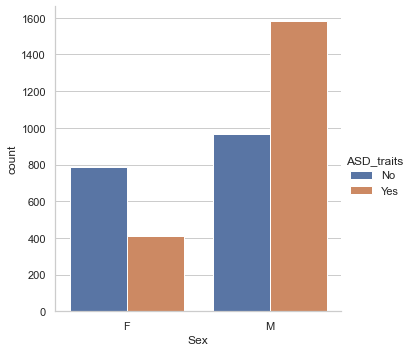

In [14]:
sns.catplot(x="Sex", hue="ASD_traits", data=df1, kind = "count")

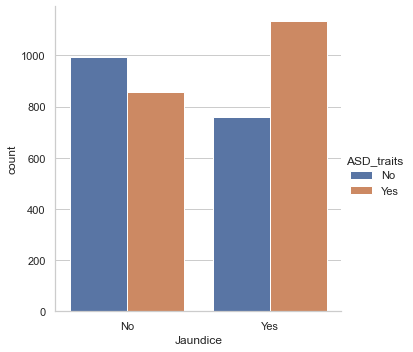

In [15]:
sns.catplot(x="Jaundice", hue="ASD_traits", data=df1, kind = "count")

**Count plot to determine the number of positive and negative ASD Traits**

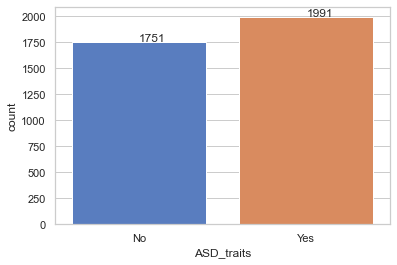

In [16]:
sns.set(style = "whitegrid")
total = float(len(df1))
ax = sns.countplot(x="ASD_traits", data=df1, palette="muted")

for z in ax.patches:
    height = z.get_height()
    ax.text(z.get_x()+z.get_width()/2., height + 3, "{:1.0f}".format(height, ha = "center"))
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'White European'),
  Text(1, 0, 'Latino'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Middle Eastern'),
  Text(5, 0, 'Black'),
  Text(6, 0, 'Pacifica'),
  Text(7, 0, 'South Asian'),
  Text(8, 0, 'Hispanic'),
  Text(9, 0, 'Turkish'),
  Text(10, 0, 'others'),
  Text(11, 0, 'Native Indian'),
  Text(12, 0, 'Mixed')])

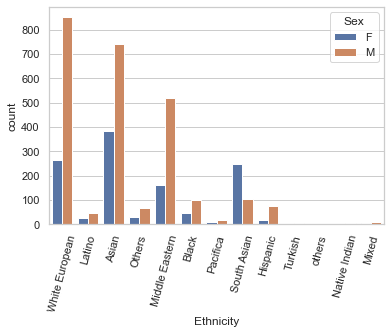

In [17]:
sns.countplot(x="Ethnicity", hue= "Sex", data = df1)
plt.xticks(rotation = 75)

**Label Encoding**

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1["Sex"]=encoder.fit_transform(df1["Sex"])
df1["ASD_traits"]= encoder.fit_transform(df1["ASD_traits"])
df1["Jaundice"]=encoder.fit_transform(df1["Jaundice"])
df1["Family_mem_with_ASD"]=encoder.fit_transform(df1["Family_mem_with_ASD"])
df1.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,1,1,1,0,0,1,1,0,0,26,0,White European,0,0,Self,0
1,1,1,0,1,1,0,1,1,1,1,27,1,Latino,1,1,Parent,1
2,1,1,0,1,0,0,1,1,0,1,35,0,White European,0,1,Self,0
3,1,0,0,0,0,0,0,1,0,0,40,0,Asian,0,0,Family Member,0
4,1,1,1,1,1,0,1,1,1,1,36,1,Others,1,0,Self,1


In [19]:
df1.drop(['Who_completed_the_test', 'Ethnicity'], axis = 1, inplace=True)

In [20]:
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Sex,Jaundice,Family_mem_with_ASD,ASD_traits
0,1,1,1,1,0,0,1,1,0,0,26,0,0,0,0
1,1,1,0,1,1,0,1,1,1,1,27,1,1,1,1
2,1,1,0,1,0,0,1,1,0,1,35,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,40,0,0,0,0
4,1,1,1,1,1,0,1,1,1,1,36,1,1,0,1


In [21]:
df1.isnull().sum()

A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Years              0
Sex                    0
Jaundice               0
Family_mem_with_ASD    0
ASD_traits             0
dtype: int64

In [22]:
#Obtain a summary of statistical data for the numerical columns.

df1.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Sex,Jaundice,Family_mem_with_ASD,ASD_traits
count,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,0.452966,0.338055,0.312133,0.381881,0.389364,0.378407,0.444682,0.380812,0.336718,0.509888,11.154463,0.681187,0.505879,0.244789,0.532068
std,0.497849,0.473110,0.463426,0.485913,0.487671,0.485055,0.496997,0.485651,0.472651,0.499969,10.644089,0.466079,0.500032,0.430019,0.499037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3742 entries, 0 to 3742
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   A1                   3742 non-null   int64
 1   A2                   3742 non-null   int64
 2   A3                   3742 non-null   int64
 3   A4                   3742 non-null   int64
 4   A5                   3742 non-null   int64
 5   A6                   3742 non-null   int64
 6   A7                   3742 non-null   int64
 7   A8                   3742 non-null   int64
 8   A9                   3742 non-null   int64
 9   A10                  3742 non-null   int64
 10  Age_Years            3742 non-null   int64
 11  Sex                  3742 non-null   int64
 12  Jaundice             3742 non-null   int64
 13  Family_mem_with_ASD  3742 non-null   int64
 14  ASD_traits           3742 non-null   int64
dtypes: int64(15)
memory usage: 467.8 KB


In [24]:
df1.quantile([.25, .5, .75], axis=0)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Sex,Jaundice,Family_mem_with_ASD,ASD_traits
0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,1.0,1.0,0.0,1.0
0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,14.0,1.0,1.0,0.0,1.0


**Identifying the outliers in Age_Years column**

<Axes: >

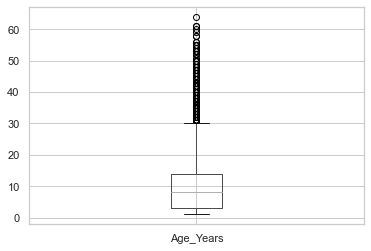

In [25]:
#Identifying outliers using boxplot
df1.boxplot("Age_Years")

<Axes: ylabel='Age_Years'>

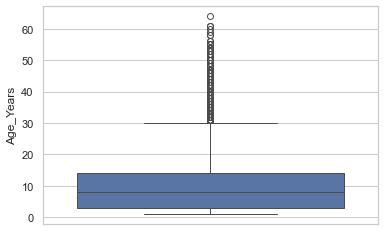

In [26]:
sns.boxplot(df1["Age_Years"])

In [27]:
Q1_Age, Q3_Age = df1["Age_Years"].quantile([0.25,0.75])
print('Q1_Age 25 percentile of the given data is,', Q1_Age)
print('Q3_Age 75 percentile of the given data is,', Q3_Age)
IQR_Age = Q3_Age - Q1_Age
print('Interquartile range for Age is Q3-Q1 =', IQR_Age)

#Upper and Lower Limits
low_lim_age = Q1_Age - 1.5 * IQR_Age
upp_lim_age = Q3_Age + 1.5 * IQR_Age
print('low_lim_age is:', low_lim_age)
print('Upp_lim_age is:', upp_lim_age)

Outlier_Age = []
for x in df1["Age_Years"]:
    if ((x>upp_lim_age) or (x<low_lim_age)):
        Outlier_Age.append(x)
print("Outlier_Age in the dataset is:", Outlier_Age)

Q1_Age 25 percentile of the given data is, 3.0
Q3_Age 75 percentile of the given data is, 14.0
Interquartile range for Age is Q3-Q1 = 11.0
low_lim_age is: -13.5
Upp_lim_age is: 30.5
Outlier_Age in the dataset is: [35, 40, 36, 64, 33, 31, 35, 34, 38, 42, 43, 40, 40, 48, 31, 37, 55, 55, 50, 34, 53, 35, 34, 36, 53, 55, 35, 47, 43, 32, 44, 35, 42, 58, 37, 33, 45, 32, 33, 42, 35, 37, 42, 37, 39, 31, 38, 42, 31, 40, 39, 40, 37, 35, 32, 31, 31, 36, 32, 34, 42, 36, 36, 55, 42, 54, 43, 43, 37, 39, 31, 34, 38, 53, 37, 42, 43, 32, 31, 53, 38, 31, 31, 60, 39, 53, 50, 37, 32, 34, 42, 37, 39, 54, 42, 31, 34, 41, 35, 36, 33, 34, 33, 46, 45, 32, 38, 33, 32, 44, 47, 32, 40, 40, 44, 56, 32, 40, 45, 55, 33, 48, 37, 37, 58, 36, 36, 37, 55, 32, 50, 40, 47, 31, 32, 61, 35, 34, 36, 33, 35, 59, 36, 52, 52, 45, 43, 37, 43, 31, 33, 33, 61, 46, 33, 38, 44, 48, 42, 37, 41, 41, 46, 40, 42, 44, 42, 35, 40, 50, 38, 47, 37, 32, 46, 32, 35, 52, 52, 32, 49, 35, 35, 37, 43, 52, 44, 46, 42, 38, 32, 39, 48, 34, 31, 47, 47

In [28]:
df1.Age_Years.median()
df1.Age_Years.mean()

11.154462854088722

In [29]:
df1["Age_Years"].max()

64

**Histogram for Distribution of Ages**

Text(0, 0.5, 'No.Of Persons')

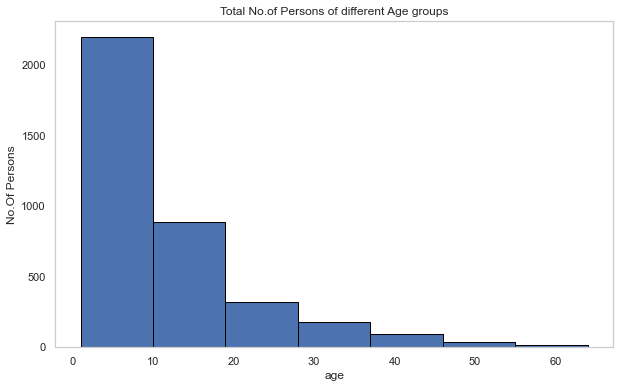

In [30]:
%matplotlib inline
plt.figure(figsize=(10,6))
plt.hist(data=df1, x="Age_Years", bins = 7, edgecolor='black')
plt.title("Total No.of Persons of different Age groups")
plt.xlabel("age")
plt.grid(False)
plt.ylabel("No.Of Persons")

**Correlation Matrix**

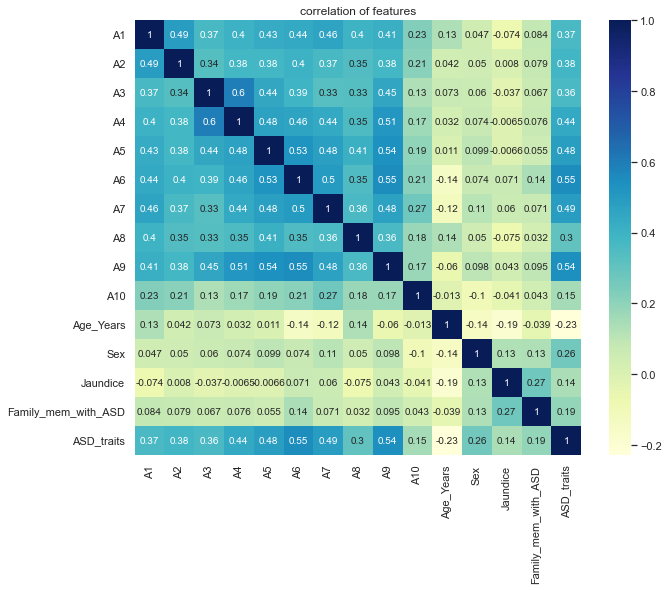

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True, cmap='YlGnBu')
plt.title("correlation of features")
plt.show()

**Model Building**

In [32]:
features = df1.drop("ASD_traits", axis=1)
target = df1["ASD_traits"]

imputer = SimpleImputer(strategy="most_frequent")  
target_imputed = imputer.fit_transform(target.values.reshape(-1, 1))
target = pd.Series(target_imputed[:, 0])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

S_K_F = StratifiedKFold(n_splits=10, shuffle=True)

models = {
    "Logistic Regression": LogisticRegression(solver="liblinear"),
    "SVM": SVC(kernel="rbf"),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

parameter_grid = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
    "SVM": {"C": [0.01, 0.1, 1]},
    "KNN": {"n_neighbors": range(1, 11), "p": [1, 2]},
    "Decision Tree": {"max_depth": range(1,11)},
    "Random Forest": {"n_estimators": range(10, 101, 10), "max_depth": range(1,11)}
}

output_data = []

for i, j in S_K_F.split(features_scaled, target):
    X_train, X_test = features_scaled[i], features_scaled[j]
    y_train, y_test = target[i], target[j]

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1001)

    for key, value in models.items():
        grid_search = GridSearchCV(value, parameter_grid[key], scoring="accuracy", cv=5)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        y_pred_val = best_model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred_val)
        precision = precision_score(y_val, y_pred_val)
        recall = recall_score(y_val, y_pred_val)
        F1_score = f1_score(y_val, y_pred_val)
        output_data.append([key, grid_search.best_params_, accuracy, precision, recall, F1_score])

print(tabulate(output_data, headers=["Model", "Best Params", "Accuracy", "Precision", "Recall", "F1-Score"], tablefmt="simple"))


Model                Best Params                               Accuracy    Precision    Recall    F1-Score
-------------------  --------------------------------------  ----------  -----------  --------  ----------
Logistic Regression  {'C': 0.01}                               0.845697     0.869822  0.830508    0.849711
SVM                  {'C': 1}                                  0.903561     0.941896  0.870056    0.904552
KNN                  {'n_neighbors': 7, 'p': 1}                0.885757     0.85422   0.943503    0.896644
Decision Tree        {'max_depth': 9}                          0.853116     0.904762  0.805085    0.852018
Random Forest        {'max_depth': 10, 'n_estimators': 100}    0.912463     0.956656  0.872881    0.912851
Logistic Regression  {'C': 0.01}                               0.829377     0.863768  0.814208    0.838256
SVM                  {'C': 1}                                  0.909496     0.949853  0.879781    0.913475
KNN                  {'n_neighbors': 

In [33]:
X_val.shape, X_test.shape, X_train.shape

((674, 14), (374, 14), (2694, 14))

**Ensembling Techniques For Predicting ASD**

In [34]:
models = {
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.1),
    "Hist Gradient Boosting": HistGradientBoostingClassifier()
}

parameter_grid = {
    "AdaBoost Classifier": {"n_estimators": range(50, 251, 50)},
    "Gradient Boosting": {"n_estimators": range(100, 1001, 100)},
    "Hist Gradient Boosting": {"learning_rate": [0.01, 0.05, 0.1], "max_iter": range(100, 501, 100)}
}

output_data = []

for i, j in S_K_F.split(features_scaled, target):
    X_train, X_test = features_scaled[i], features_scaled[j]
    y_train, y_test = target[i], target[j]

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1001)

    for key, value in models.items():
        grid_search = GridSearchCV(value, parameter_grid[key], scoring="accuracy", cv=3)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        y_pred_val = best_model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred_val)
        precision = precision_score(y_val, y_pred_val)
        recall = recall_score(y_val, y_pred_val)
        F1_score = f1_score(y_val, y_pred_val) 
        output_data.append([key, grid_search.best_params_, accuracy, precision, recall, F1_score])

print(tabulate(output_data, headers=["Model", "Best Params", "Accuracy", "Precision", "Recall", "F1-Score"], tablefmt="simple"))


Model                   Best Params                                 Accuracy    Precision    Recall    F1-Score
----------------------  ----------------------------------------  ----------  -----------  --------  ----------
AdaBoost Classifier     {'n_estimators': 50}                        0.810089     0.846847  0.785515    0.815029
Gradient Boosting       {'n_estimators': 900}                       0.921365     0.942197  0.908078    0.924823
Hist Gradient Boosting  {'learning_rate': 0.1, 'max_iter': 100}     0.894659     0.902235  0.899721    0.900976
AdaBoost Classifier     {'n_estimators': 250}                       0.833828     0.863222  0.809117    0.835294
Gradient Boosting       {'n_estimators': 300}                       0.910979     0.936937  0.888889    0.912281
Hist Gradient Boosting  {'learning_rate': 0.1, 'max_iter': 400}     0.916914     0.913165  0.928775    0.920904
AdaBoost Classifier     {'n_estimators': 150}                       0.866469     0.906344  0.835655    0

**Random Forest Classifier**

In [35]:
X = df1.drop("ASD_traits", axis = 1)
y = df1["ASD_traits"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1001)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid ={
    'n_estimators':range(50, 101, 10),
    'max_depth':range(1,11)
}

clf_RF = RandomForestClassifier()
grid_search = GridSearchCV(estimator=clf_RF, param_grid = param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
y_pred_RF = best_model.predict(X_test_scaled)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(f"Accuracy of RF: {accuracy_RF}")
print(f"Best Parameters: {best_params}")
print(classification_report(y_test, y_pred_RF))

Accuracy of RF: 0.9265687583444593
Best Parameters: {'max_depth': 9, 'n_estimators': 70}
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       355
           1       0.97      0.89      0.93       394

    accuracy                           0.93       749
   macro avg       0.93      0.93      0.93       749
weighted avg       0.93      0.93      0.93       749



**Confusion Matrix for a Random Forest Classifier**

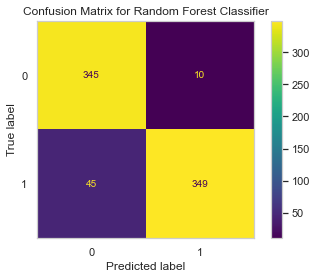

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.grid(False)
plt.show()

**ROC Curve for a Random Forest Classifier**

In [37]:
y_proba_RF = best_model.predict_proba(X_test_scaled)[:, 1]

Random Forest AUC: 0.9842603846428828


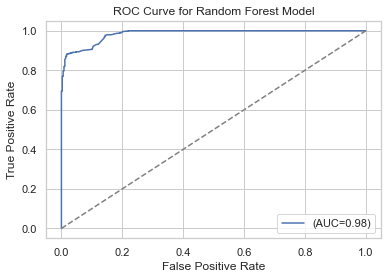

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_RF)

ROC_AUC = roc_auc_score(y_test, y_proba_RF)
plt.plot(fpr, tpr, label=f'(AUC={ROC_AUC:.2f})')
plt.plot([0, 1], [0, 1], '--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Model")
print(f"Random Forest AUC: {ROC_AUC}")
plt.legend()
plt.show()

**Precision-Recall Curve for a Random Forest Classifier**

Average Precision Score is: 0.9860796677536912


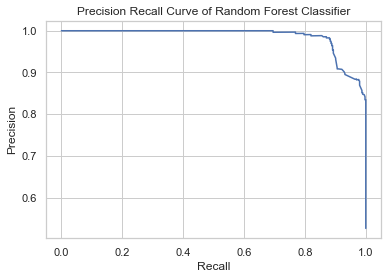

In [39]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_RF)
average_precision = average_precision_score(y_test, y_proba_RF)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve of Random Forest Classifier")
print(f"Average Precision Score is: {average_precision}")
plt.show()

**KNN Classifier**

In [40]:
param_grid ={
    'n_neighbors':range(1,11),
    'p':[1, 2]
}

clf_KNN = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=clf_KNN, param_grid = param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred_KNN = best_model.predict(X_test_scaled)

accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print(f"Accuracy of KNN: {accuracy_KNN}")
print(f"Best Parameters: {best_params}")
print(classification_report(y_test, y_pred_KNN))

Accuracy of KNN: 0.8985313751668892
Best Parameters: {'n_neighbors': 3, 'p': 2}
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       355
           1       0.90      0.91      0.90       394

    accuracy                           0.90       749
   macro avg       0.90      0.90      0.90       749
weighted avg       0.90      0.90      0.90       749



**Confusion Matrix for a KNN Classifier**

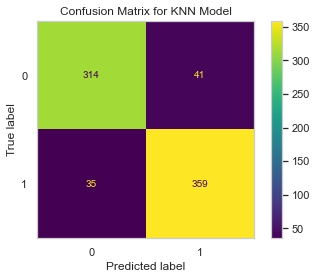

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_KNN)
plt.title("Confusion Matrix for KNN Model")
plt.grid(False)
plt.show()

**ROC Curve for a KNN classifier**

In [42]:
y_proba_KNN = best_model.predict_proba(X_test_scaled)[:, 1]

KNN classifier AUC: 0.941792378637306


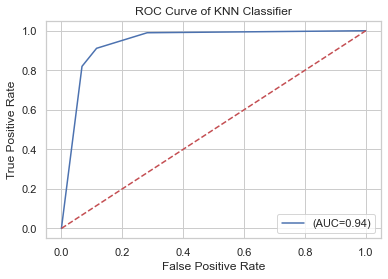

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_KNN)
ROC_AUC = roc_auc_score(y_test, y_proba_KNN)
plt.plot(fpr, tpr, label=f'(AUC={ROC_AUC:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC Curve of KNN Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print(f"KNN classifier AUC: {ROC_AUC}")
plt.legend()
plt.show()

**Precision-Recall Curve for a KNN classifier**

Average Precision Score is: 0.913064849245355


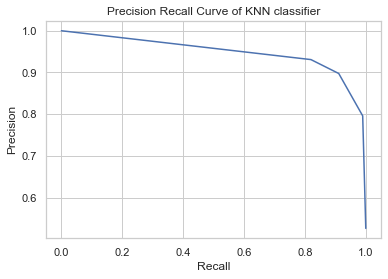

In [44]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_KNN)
average_precision = average_precision_score(y_test, y_proba_KNN)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve of KNN classifier")
print(f"Average Precision Score is: {average_precision}")
plt.show()

**Decision Tree Classifier**

In [45]:
param_grid ={
    'max_depth':range(1,11)
}

clf_DT = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf_DT, param_grid = param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred_DT = best_model.predict(X_test_scaled)

accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f"Accuracy of DT: {accuracy_DT}")
print(f"Best Parameters: {best_params}")
clf_report = classification_report(y_test,y_pred_DT)
print("classification Report:\n", clf_report)

Accuracy of DT: 0.8998664886515354
Best Parameters: {'max_depth': 10}
classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       355
           1       0.94      0.86      0.90       394

    accuracy                           0.90       749
   macro avg       0.90      0.90      0.90       749
weighted avg       0.90      0.90      0.90       749



**Confusion Matrix for a Decision Tree Classifier**

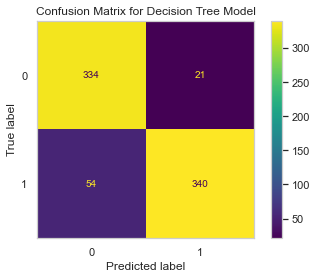

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_DT)
plt.title("Confusion Matrix for Decision Tree Model")
plt.grid(False)
plt.show()

**ROC Curve for a Decision Tree Classifier**

In [47]:
y_proba_DT = best_model.predict_proba(X_test_scaled)[:, 1]

Decision Tree Classifier AUC: 0.9501072424394081


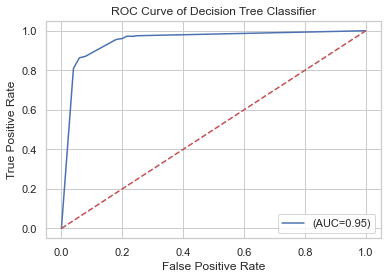

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_DT)
ROC_AUC = roc_auc_score(y_test, y_proba_DT)
plt.plot(fpr, tpr, label=f'(AUC={ROC_AUC:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC Curve of Decision Tree Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print(f"Decision Tree Classifier AUC: {ROC_AUC}")
plt.legend()
plt.show()

**Precision-Recall Curve for a Decision Tree Classifier**

Average Precision Score is: 0.9351723285462501


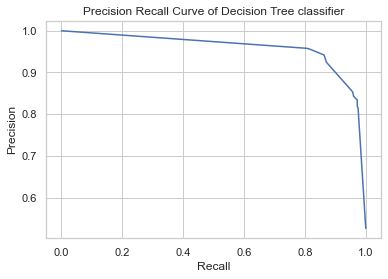

In [49]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_DT)
average_precision = average_precision_score(y_test, y_proba_DT)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve of Decision Tree classifier")
print(f"Average Precision Score is: {average_precision}")
plt.show()

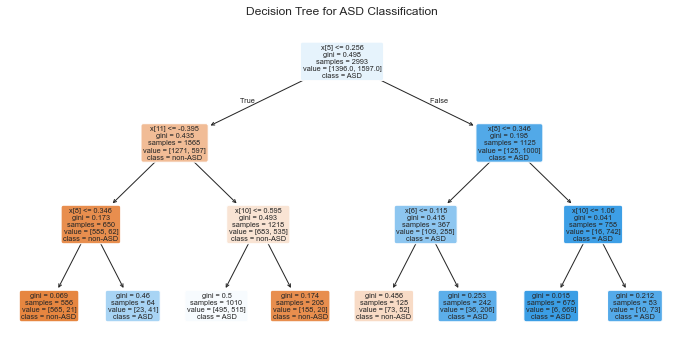

In [50]:
param_grid ={
    'max_depth':[3]
}

clf_DT = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf_DT, param_grid = param_grid)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

from sklearn.tree import plot_tree
plt.figure(figsize=(12, 6))  
plot_tree(best_model, filled=True, rounded=True, class_names=["non-ASD", "ASD"])
plt.title("Decision Tree for ASD Classification")
plt.show()

**SVM Classifier**

In [51]:
param_grid ={
   "C":[0.01, 0.1, 1],
    "kernel":["linear", "rbf"]
}

clf_SVM = SVC(probability=True)
grid_search = GridSearchCV(estimator=clf_SVM, param_grid = param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred_SVM = best_model.predict(X_test_scaled)

accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print(f"Accuracy of SVM: {accuracy_SVM}")
print(f"Best Parameters: {best_params}")
print(classification_report(y_test, y_pred_SVM))

Accuracy of SVM: 0.9212283044058746
Best Parameters: {'C': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       355
           1       0.96      0.89      0.92       394

    accuracy                           0.92       749
   macro avg       0.92      0.92      0.92       749
weighted avg       0.92      0.92      0.92       749



**Confusion Matrix for a Support Vector Classifier**

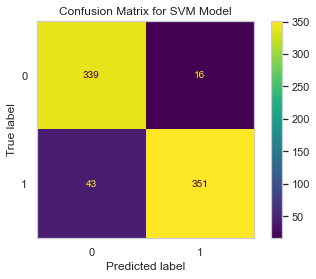

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SVM)
plt.title("Confusion Matrix for SVM Model")
plt.grid(False)
plt.show()

**ROC Curve for a Support Vector Classifier**

In [53]:
y_proba_SVM = best_model.predict_proba(X_test_scaled)[:, 1]

SVC AUC: 0.9709766211482092


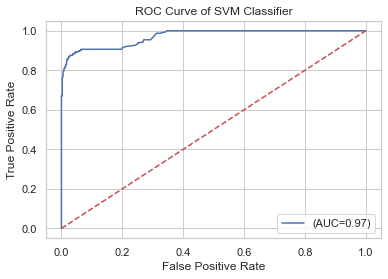

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_SVM)
ROC_AUC = roc_auc_score(y_test, y_proba_SVM)
plt.plot(fpr, tpr, label=f'(AUC={ROC_AUC:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC Curve of SVM Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print(f"SVC AUC: {ROC_AUC}")
plt.legend()
plt.show()

**Precision-Recall Curve for a Support Vector Classifier**

Average Precision Score is: 0.9771955972537724


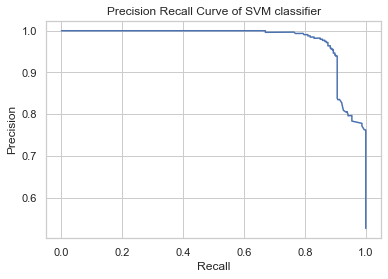

In [55]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_SVM)
average_precision = average_precision_score(y_test, y_proba_SVM)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve of SVM classifier")
print(f"Average Precision Score is: {average_precision}")
plt.show()

**Logistic Regression**

In [56]:
param_grid ={
    'C':[0.001, 0.01, 0.1, 1],
    'solver':["liblinear","lbfgs"]
}

clf_LR = LogisticRegression()
grid_search = GridSearchCV(estimator=clf_LR, param_grid = param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred_LR = best_model.predict(X_test_scaled)

accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f"Accuracy of LR: {accuracy_LR}")
print(f"Best Parameters: {best_params}")
print(classification_report(y_test, y_pred_LR))

Accuracy of LR: 0.8451268357810414
Best Parameters: {'C': 0.001, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       355
           1       0.88      0.81      0.85       394

    accuracy                           0.85       749
   macro avg       0.85      0.85      0.85       749
weighted avg       0.85      0.85      0.85       749



**Confusion Matrix for Logistic Regression Model**

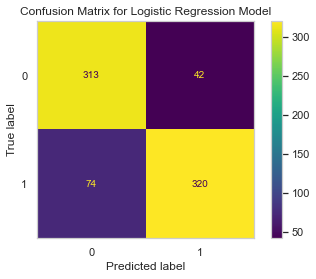

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LR)
plt.title("Confusion Matrix for Logistic Regression Model")
plt.grid(False)
plt.show()

**ROC Curve for a Logistic Regression Model**

In [58]:
y_proba_LR = best_model.predict_proba(X_test_scaled)[:, 1]

Logistic Regression AUC: 0.8938621577178809


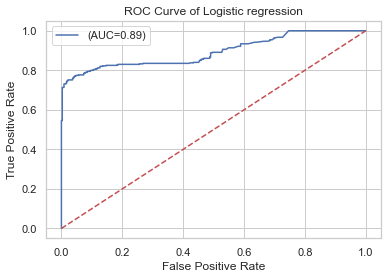

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_LR)
ROC_AUC = roc_auc_score(y_test, y_proba_LR)
plt.plot(fpr, tpr, label=f'(AUC={ROC_AUC:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC Curve of Logistic regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print(f"Logistic Regression AUC: {ROC_AUC}")
plt.legend()
plt.show()

**Precision Recall Curve for a Logistic Regression Model**

Average Precision Score is: 0.9307939655875496


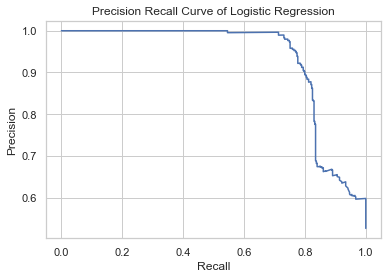

In [60]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_LR)
average_precision = average_precision_score(y_test, y_proba_LR)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve of Logistic Regression")
print(f"Average Precision Score is: {average_precision}")
plt.show()

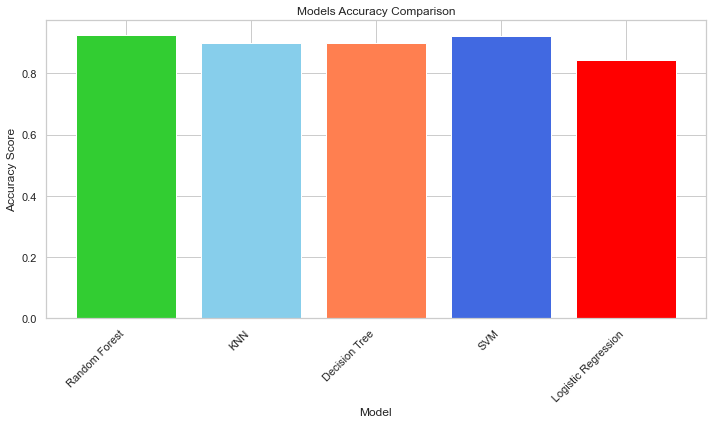

In [61]:
model_names = ["Random Forest", "KNN", "Decision Tree", "SVM", "Logistic Regression"]
accuracies = [accuracy_RF, accuracy_KNN, accuracy_DT, accuracy_SVM, accuracy_LR]

plt.figure(figsize=(10,6))
plt.bar(model_names, accuracies, color=['limegreen', 'skyblue', 'coral', 'royalblue', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Models Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

**AdaBoost Classifier**

In [62]:
clf_ABC = AdaBoostClassifier(n_estimators=500, learning_rate=1)

clf_ABC.fit(X_train_scaled, y_train)

y_pred_ABC = clf_ABC.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_ABC)
print(f"Accuraccy of ABC:{accuracy}")
print(classification_report(y_test,y_pred_ABC))

Accuraccy of ABC:0.835781041388518
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       355
           1       0.88      0.80      0.84       394

    accuracy                           0.84       749
   macro avg       0.84      0.84      0.84       749
weighted avg       0.84      0.84      0.84       749



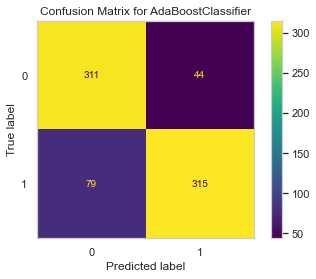

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ABC)
plt.title("Confusion Matrix for AdaBoostClassifier")
plt.grid(False)
plt.show()

In [64]:
y_proba_ABC = best_model.predict_proba(X_test_scaled)[:, 1]

AdaBoost Classifier AUC: 0.8938621577178809


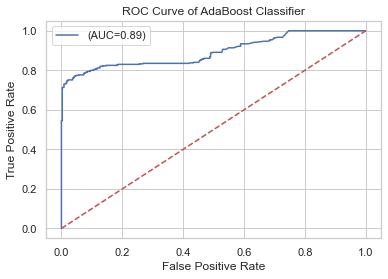

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_ABC)
ROC_AUC = roc_auc_score(y_test, y_proba_ABC)
plt.plot(fpr, tpr, label=f'(AUC={ROC_AUC:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC Curve of AdaBoost Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print(f"AdaBoost Classifier AUC: {ROC_AUC}")
plt.legend()
plt.show()

Average Precision Score is: 0.9307939655875496


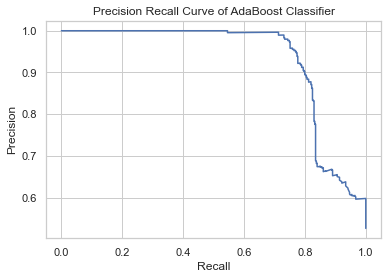

In [66]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_ABC)
average_precision = average_precision_score(y_test, y_proba_ABC)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve of AdaBoost Classifier")
print(f"Average Precision Score is: {average_precision}")
plt.show()

**Gradient Boosting Classifier**

In [67]:
clf_GBC = GradientBoostingClassifier(n_estimators=500)

clf_GBC.fit(X_train_scaled, y_train)

y_pred_GBC = clf_GBC.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_GBC)
print(f"Accuraccy of GBC:{accuracy}")
print(classification_report(y_test,y_pred_GBC))

Accuraccy of GBC:0.9238985313751669
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       355
           1       0.96      0.90      0.93       394

    accuracy                           0.92       749
   macro avg       0.92      0.93      0.92       749
weighted avg       0.93      0.92      0.92       749



**Confusion Matrix for Gradient Boosting Classifier**

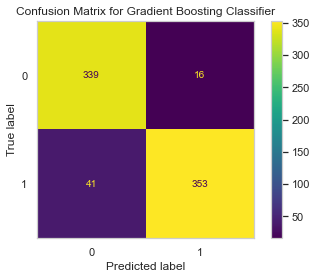

In [68]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_GBC)
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.grid(False)
plt.show()

**ROC Curve for Gradient Boosting Classifier**

In [69]:
y_proba_GBC = clf_GBC.predict_proba(X_test_scaled)[:, 1]

Gradient Boosting Classifier AUC: 0.9843390290984485


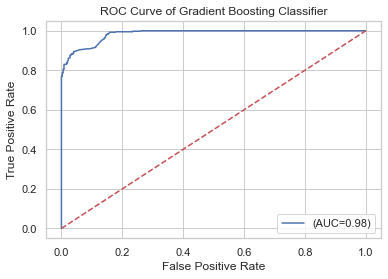

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_GBC)
ROC_AUC = roc_auc_score(y_test, y_proba_GBC)
plt.plot(fpr, tpr, label=f'(AUC={ROC_AUC:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC Curve of Gradient Boosting Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print(f"Gradient Boosting Classifier AUC: {ROC_AUC}")
plt.legend()
plt.show()

**Precision-Recall Curve for Gradient Boosting Classifier**

Average Precision Score is: 0.9861315026151157


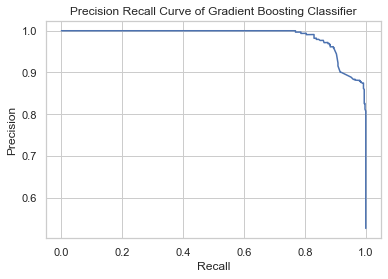

In [71]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_GBC)
average_precision = average_precision_score(y_test, y_proba_GBC)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve of Gradient Boosting Classifier")
print(f"Average Precision Score is: {average_precision}")
plt.show()

**Hist Gradient Boosting Classifier**

In [72]:
clf_HGBC = HistGradientBoostingClassifier(learning_rate =0.05, max_iter = 100)

clf_HGBC.fit(X_train_scaled, y_train)

y_pred_HGBC = clf_HGBC.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_HGBC)
print(f"Accuracy of HGBC:{accuracy}")
print(classification_report(y_test,y_pred_HGBC))

Accuracy of HGBC:0.9292389853137517
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       355
           1       0.97      0.89      0.93       394

    accuracy                           0.93       749
   macro avg       0.93      0.93      0.93       749
weighted avg       0.93      0.93      0.93       749



**Confusion Matrix for Hist Gradient Boosting Classifier**

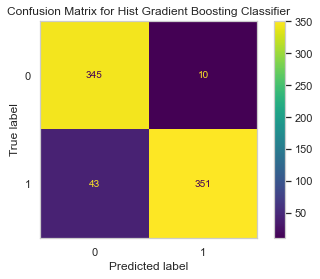

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_HGBC)
plt.title("Confusion Matrix for Hist Gradient Boosting Classifier")
plt.grid(False)
plt.show()

**ROC curve for Hist Gradient Boosting Classifier**

In [74]:
y_proba_HGBC = clf_HGBC.predict_proba(X_test_scaled)[:, 1]

Hist Gradient Boosting Classifier AUC: 0.9866733395295632


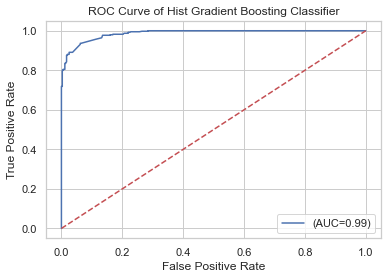

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_HGBC)
ROC_AUC = roc_auc_score(y_test, y_proba_HGBC)
plt.plot(fpr, tpr, label=f'(AUC={ROC_AUC:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC Curve of Hist Gradient Boosting Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print(f"Hist Gradient Boosting Classifier AUC: {ROC_AUC}")
plt.legend()
plt.show()

**Precision-Recall Curve for Hist Gradient Boosting Classifier**

Average Precision Score is: 0.9877412381606052


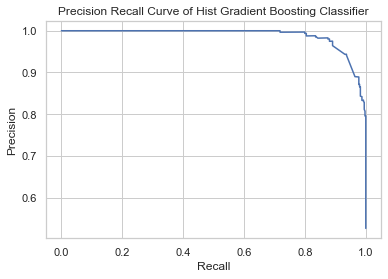

In [76]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_HGBC)
average_precision = average_precision_score(y_test, y_proba_HGBC)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve of Hist Gradient Boosting Classifier")
print(f"Average Precision Score is: {average_precision}")
plt.show()

**Plotting the confusion matrices as Subplots**

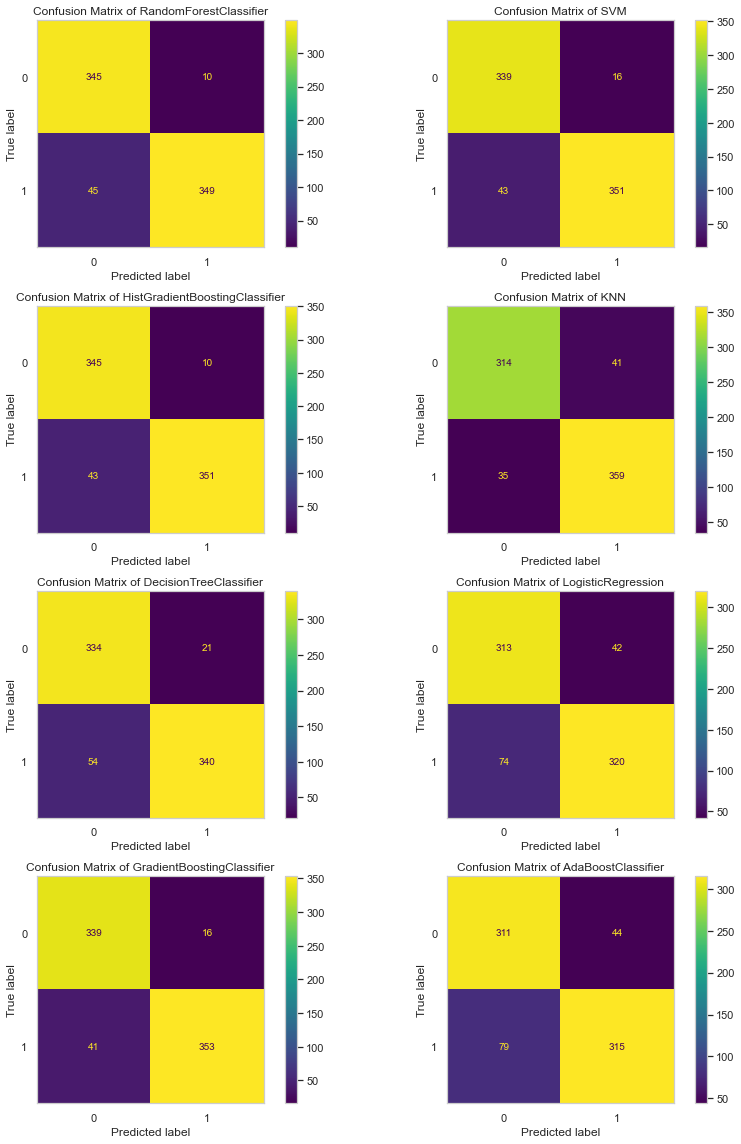

In [77]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

classifiers = ["RandomForestClassifier", "SVM", "HistGradientBoostingClassifier", "KNN", 
               "DecisionTreeClassifier", "LogisticRegression", "GradientBoostingClassifier", "AdaBoostClassifier"]
y_pred_classifiers = [y_pred_RF, y_pred_SVM, y_pred_HGBC, y_pred_KNN, y_pred_DT, y_pred_LR, y_pred_GBC, y_pred_ABC]

for i, (model, y_pred) in enumerate(zip(classifiers, y_pred_classifiers)):
    ax = axes.flat[i]
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
    ax.set_title(f"Confusion Matrix of {model}")
    ax.grid(False)    
plt.tight_layout()
plt.show()

**Comparision of Model Performance using ROC Curves**

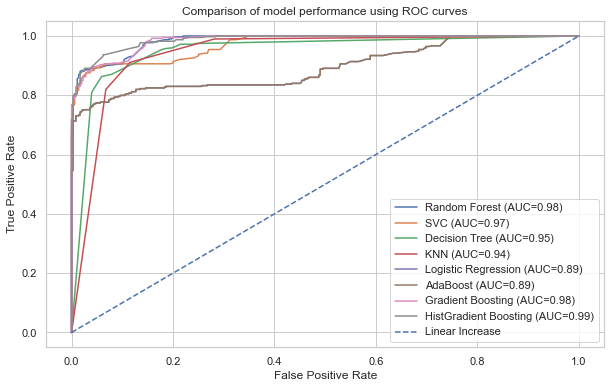

In [78]:
df2 = pd.DataFrame({"Random Forest":y_proba_RF, "SVC":y_proba_SVM,"KNN":y_proba_KNN, 
                    "Decision Tree":y_proba_DT, "Logistic Regression":y_proba_LR, "AdaBoost":y_proba_ABC,
                   "Gradient Boosting":y_proba_GBC, "HistGradient Boosting":y_proba_HGBC})

plt.figure(figsize=(10,6))
for i in ['Random Forest','SVC', 'Decision Tree', 'KNN', 'Logistic Regression', 
          'AdaBoost', 'Gradient Boosting', 'HistGradient Boosting']:
    fpr, tpr, thresholds = roc_curve(y_test, df2[i])
    ROC_AUC = roc_auc_score(y_test, df2[i])
    plt.plot(fpr, tpr, label=f'{i} (AUC={ROC_AUC:.2f})')
    
plt.plot([0, 1], [0, 1], 'b--', label='Linear Increase')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of model performance using ROC curves')
plt.legend()
plt.show()

**Comparison Of Model Performance Using Precision-Recall Curves**

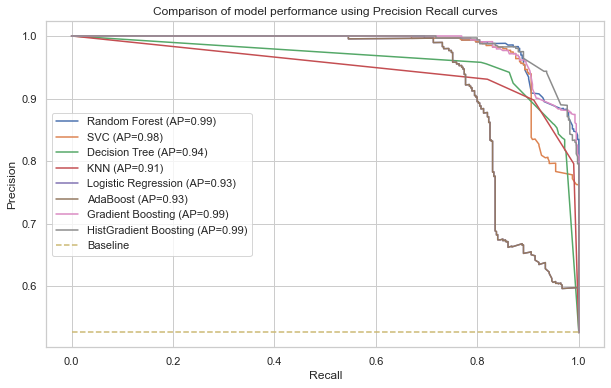

In [79]:
no_skill = len(y_test[y_test==1])/len(y_test)

plt.figure(figsize=(10,6))
for j in ['Random Forest','SVC', 'Decision Tree', 'KNN', 'Logistic Regression', 
          'AdaBoost', 'Gradient Boosting', 'HistGradient Boosting']:
    precision, recall, thresholds = precision_recall_curve(y_test, df2[j])
    average_precision = average_precision_score(y_test, df2[j])
    plt.plot(recall, precision, label=f'{j} (AP={average_precision:.2f})')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Baseline')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparison of model performance using Precision Recall curves')
plt.legend()
plt.show()

**Saving the model to a pickle file**

In [80]:
import pickle
with open("Predicting_Autism.pickle", 'wb') as f:
    pickle.dump(clf_HGBC, f)

In [81]:
#Loading the model using pickle file

with open("Predicting_Autism.pickle", 'rb') as f:
    loaded_clf= pickle.load(f)
    
y_pred = loaded_clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test,y_pred)
print("Accuracy", accuracy)
print("classification Report:\n", clf_report)

Accuracy 0.9292389853137517
classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       355
           1       0.97      0.89      0.93       394

    accuracy                           0.93       749
   macro avg       0.93      0.93      0.93       749
weighted avg       0.93      0.93      0.93       749

